In [11]:
import yfinance as yf
import matplotlib.pyplot as plt
import talib as ta
import math
from backtester.backtester import Backtester
from backtester.strategy import Strategy
from backtester.historical_data import HistoricalData

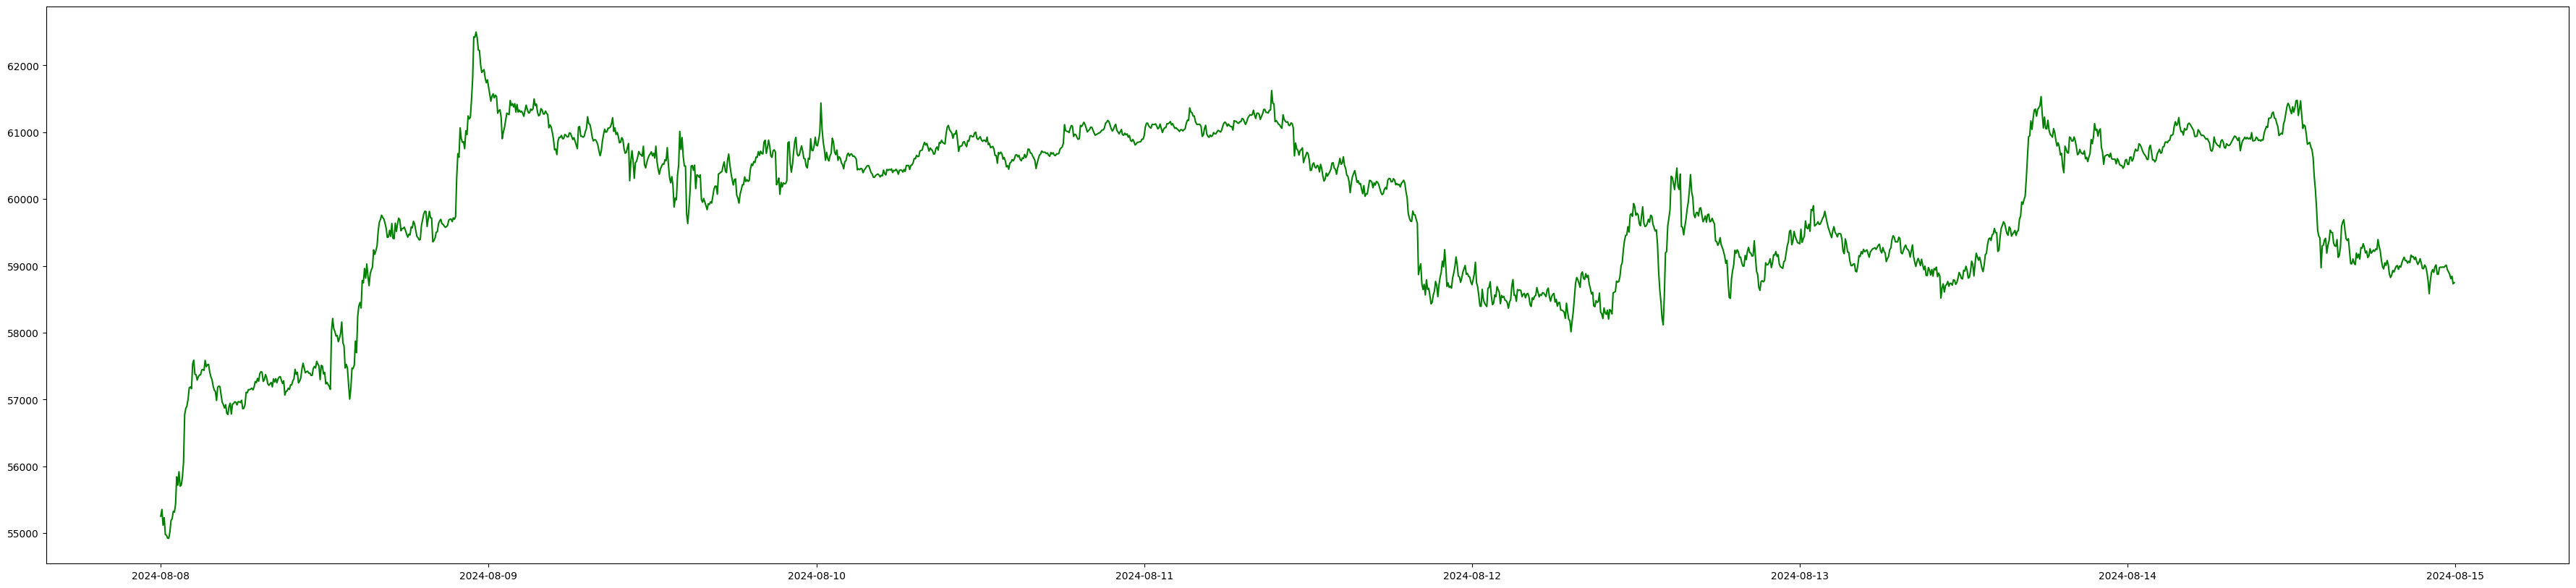

In [12]:
historical_data = HistoricalData('BTC-USD', '2024-08-08', '2024-08-15', '5m')
data = historical_data.get_data()
historical_data.plot_data()

In [13]:
class EMACrossoverStrategy(Strategy):
    def __init__(self, data, short_period, long_period):
        super().__init__(data)
        self.data['Short EMA'] = ta.EMA(data['Close'], short_period)
        self.data['Long EMA'] = ta.EMA(data['Close'], long_period)
             
    def implement(self):
        for i in data.index:
            if self.is_position == False:
                if (self.data.at[i, 'Short EMA'] > self.data.at[i, 'Long EMA']):
                    self.is_position = True
                    self.buy_trade(i)
                    self.data.at[i, 'Signal'] = 1
            else:            
                if (data.at[i, 'Short EMA'] <= data.at[i, 'Long EMA']):
                    self.is_position = False
                    self.close_trade(i)
                    self.data.at[i, 'Signal'] = 0
                else:
                    self.data.at[i, 'Signal'] = 1

    def plot_indicators(self):
        _, axis = plt.subplots(1, figsize=(45, 10))
        axis.plot(self.data.index, self.data['Close'], color='blue')
        axis.plot(self.data.index, self.data['Short EMA'], color='green')
        axis.plot(self.data.index, self.data['Long EMA'], color='red')

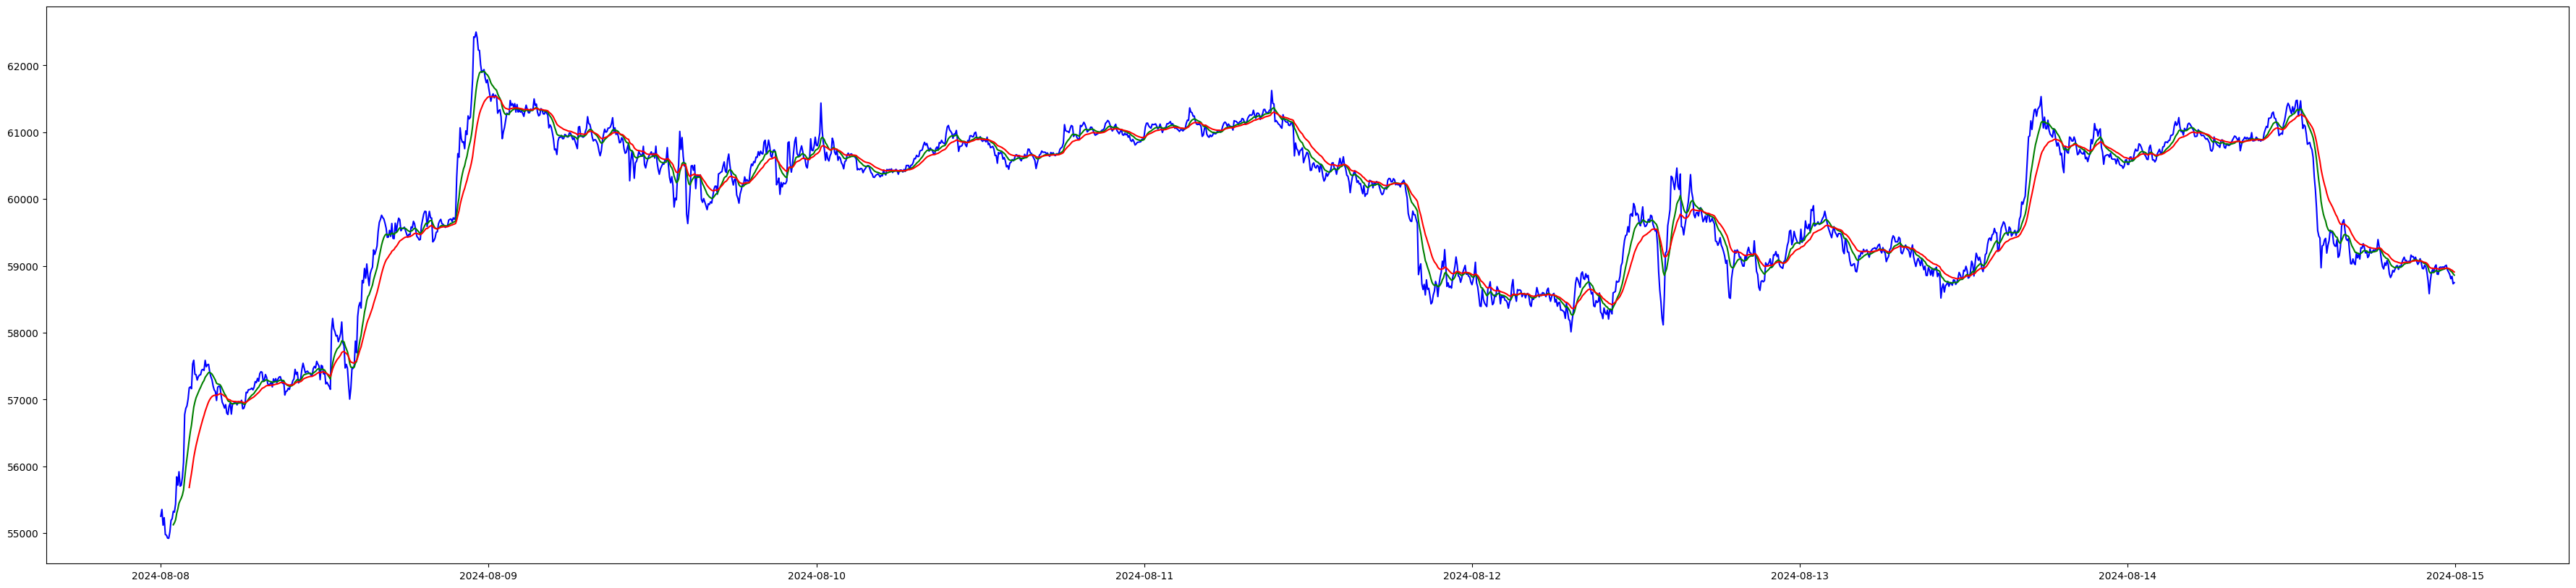

In [14]:
emaCrossover = EMACrossoverStrategy(data, 12, 26)
emaCrossover.implement()
emaCrossover.plot_indicators()

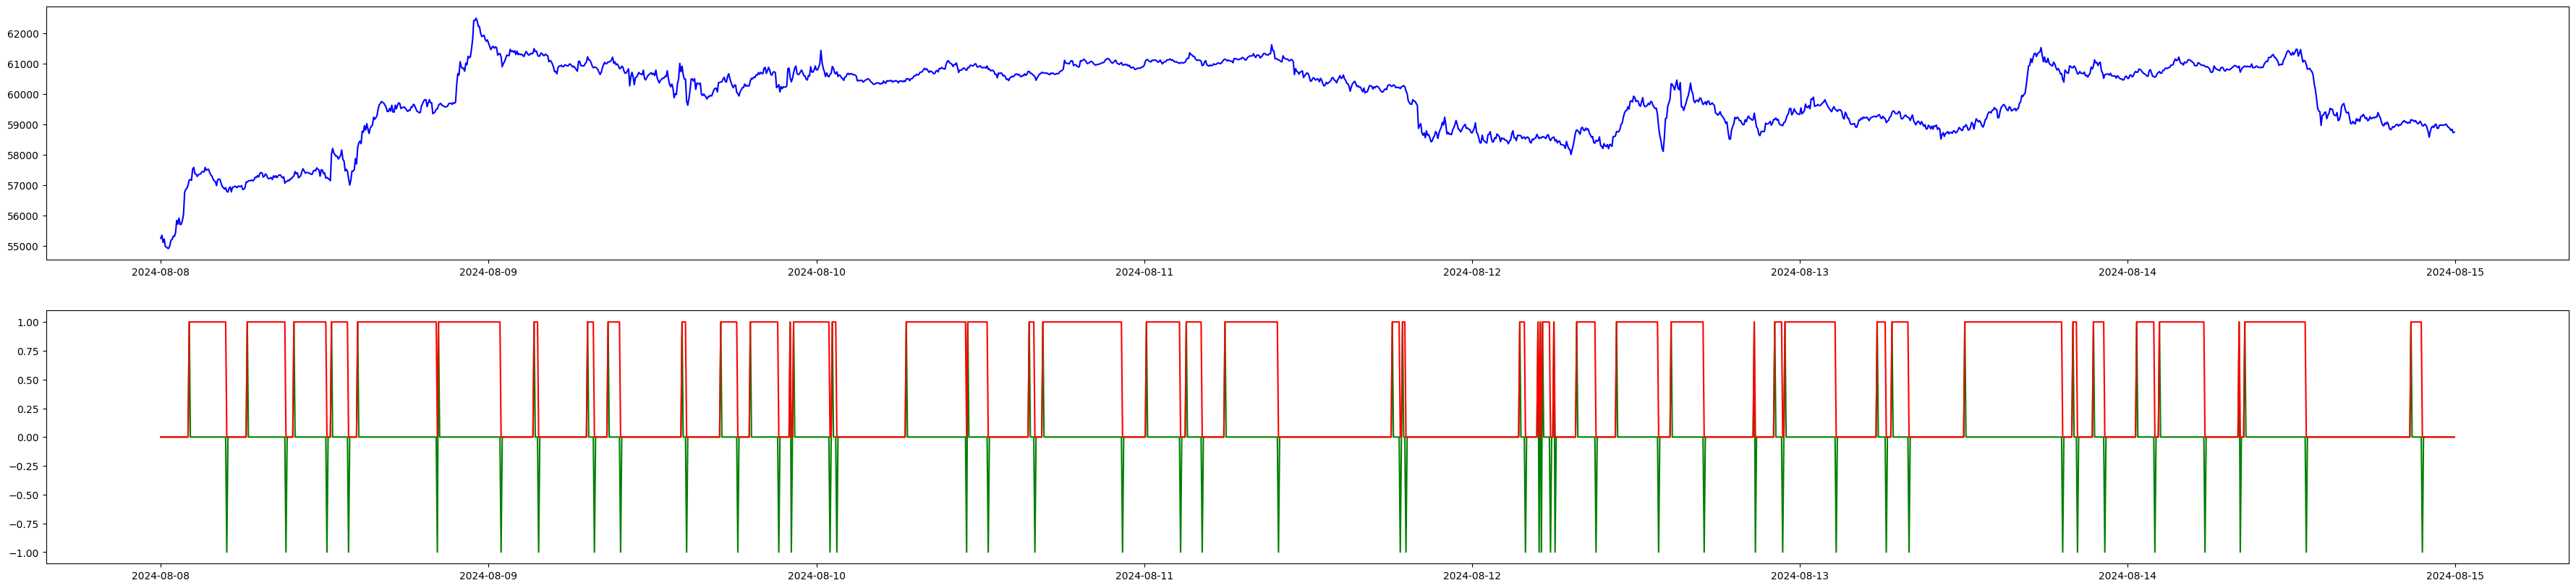

In [15]:
emaCrossover.plot_positions()

/Users/snehil1998/Documents/Repos/trading-strategies/backtester/backtester.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1000.2285986003972' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.data.at[i, 'Cumulative Strategy Returns'] = cash


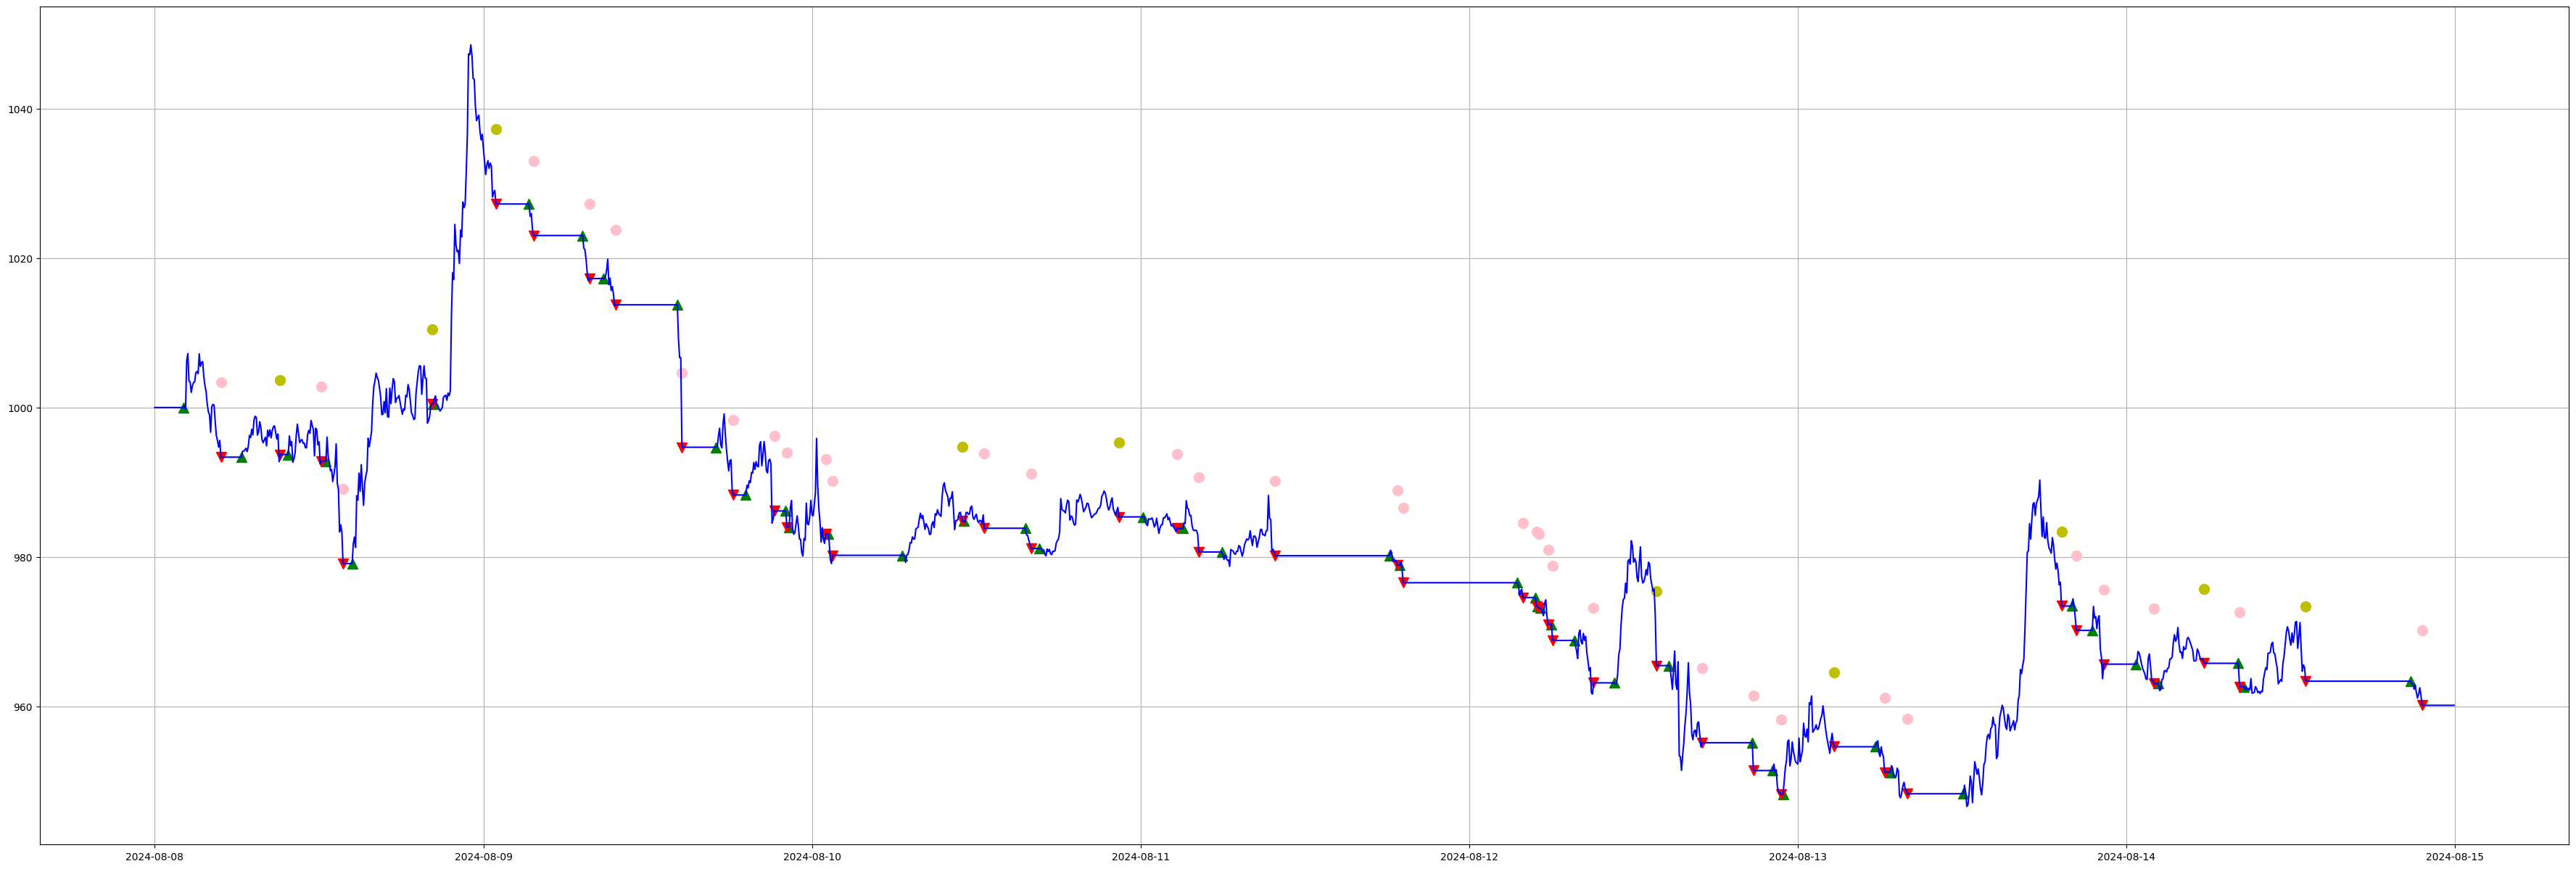

In [16]:
backtester = Backtester(emaCrossover, data, 0.0, 1000, 1, 5)
backtester.backtest()
backtester.plot_backtest()

In [17]:
backtester.get_metrics()

Final value:  960.1247898579957
P&L:  -39.875210142004335
Returns %:  -3.9875210142004334
Number of trades:  45
Number of loss trades:  35
Number of profit trades:  10
Annual Sharpe ratio:  -4.074099029402246
Max profit:  48.57541527321541
Max loss:  -53.42085275373063


/Users/snehil1998/Documents/Repos/trading-strategies/backtester/backtester.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Final value: ', self.data['Cumulative Strategy Returns'][-1])
/Users/snehil1998/Documents/Repos/trading-strategies/backtester/backtester.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('P&L: ', self.data['Cumulative Strategy Returns'][-1] - self.amount_invested)
/Users/snehil1998/Documents/Repos/trading-strategies/backtester/backtester.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated 

In [43]:
class Optimizer:
    pass